<a href="https://colab.research.google.com/github/cam2149/MachineLearningIII/blob/main/fundamentos_anal%C3%ADtica_clase2.solucion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fundamentos de analítica 2 (clase 2)

## Diego Fernando Agudelo
## Universidad ICESI
## diegoagudelo30@gmail.com


## Integrantes

**Integrantes**

* Andrés Felipe Borrero
* Yesid Castelblanco Caro
* Nicolás Colmenares
* Carlos Alberto Martinez Ramirez

### **1.2. Ejercicio en Clase**

Empleando la información del número de ocupados en miles de personas (Ocupados) para las 13 principales ciudades, encuentre el mejor pronóstico para los próximos 6 meses empleando los métodos vistos en la clase. Compare
los resultados con el mejor modelo encontrado en el ejercicio anterior.

Escriba un breve informe de máximo una página de texto que explique cómo llega a sus proyeccciones y presente las proyecciones. Aclare en el texto cuáles serían las limitaciones de sus pronósticos.

## **1. Carga de paquetes**

In [1]:
import pandas as pd
import numpy as np
from statsmodels.sandbox.stats.runs import runstest_1samp # prueba de rachas de Wald y Wolfowitz
import statsmodels.api as sm # prueba de Box-Pierce y la modificación de Ljung-Box
from matplotlib import pyplot as plt # gráficos
import pylab as py
from scipy import stats
from datetime import datetime
from dateutil.relativedelta import relativedelta
from sklearn.metrics import mean_squared_error
import math

## **2. Carga de datos**

In [2]:
data = pd.read_excel("https://raw.githubusercontent.com/cam2149/MachineLearningIII/refs/heads/main/datosEmpleo.xlsx",index_col='mes',parse_dates=True)
data.head()

,TD_13ciudades,Ocupados,Desocupados,Inactivos
mes,,,,
2001-01-01,20.946380,6923.604,1834.507,4600.718
2001-02-01,19.894213,7037.746,1747.820,4596.805
2001-03-01,19.221565,6945.973,1652.823,4807.120
2001-04-01,17.888575,6973.079,1519.137,4937.280
2001-05-01,17.945654,6994.462,1529.720,4928.911


In [3]:
range_dates = pd.date_range(data.index[-1]+ relativedelta(months=1), periods=6,freq='MS')

## **3. Tendencia Lineal**

In [4]:
y = data["Ocupados"]
x = np.linspace(1,data.shape[0],data.shape[0])
X = sm.add_constant(x)
lin = sm.OLS(y,X)
lin_t = lin.fit()
print(lin_t.summary())

                            OLS Regression Results                            
Dep. Variable:               Ocupados   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     4768.
Date:                Mon, 16 Dec 2024   Prob (F-statistic):          3.78e-150
Time:                        22:06:40   Log-Likelihood:                -1543.4
No. Observations:                 220   AIC:                             3091.
Df Residuals:                     218   BIC:                             3097.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6953.2351     36.621    189.870      0.0

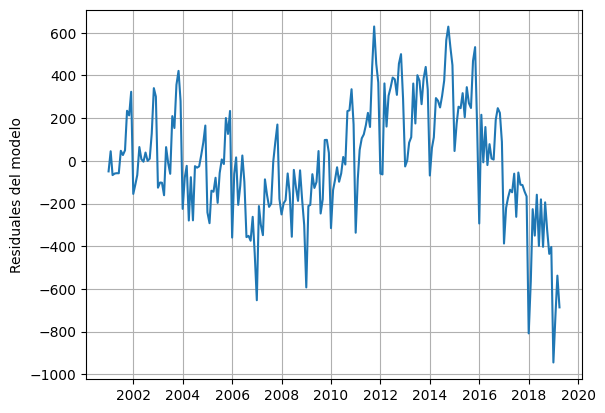

In [5]:
plt.ylabel("Residuales del modelo")
plt.plot(lin_t.resid)
plt.grid()

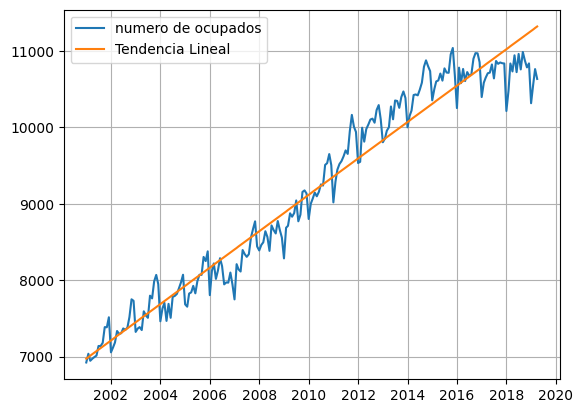

In [6]:
plt.plot(y,label="numero de ocupados")
plt.plot(lin_t.fittedvalues,label="Tendencia Lineal")
plt.legend()
plt.grid()
plt.show()

In [7]:
h=6
x_for= np.linspace((data.shape[0]+1),(data.shape[0]+h),h)
X_for= sm.add_constant(x_for)


In [8]:
dt = lin_t.get_prediction(X_for).summary_frame(alpha = 0.05)
y_prd = dt['mean']
yprd_ci_lower = dt['obs_ci_lower']
yprd_ci_upper = dt['obs_ci_upper']
preds = pd.DataFrame(np.column_stack([y_prd, yprd_ci_lower, yprd_ci_upper]))
preds.columns = ['Point_forecast', 'lower_95', 'upper_95']
preds.set_index(range_dates,inplace=True)
print(preds)

            Point_forecast      lower_95      upper_95
2019-05-01    11338.111638  10799.800067  11876.423210
2019-06-01    11357.952709  10819.575011  11896.330406
2019-07-01    11377.793779  10839.349368  11916.238190
2019-08-01    11397.634849  10859.123137  11936.146561
2019-09-01    11417.475919  10878.896319  11956.055519
2019-10-01    11437.316989  10898.668914  11975.965064


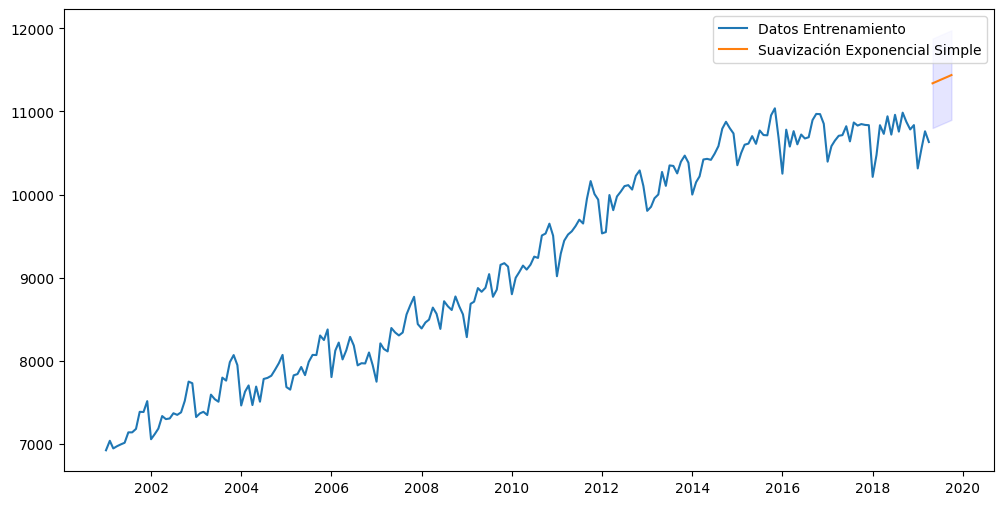

In [9]:
fig = plt.figure(figsize=(12, 6))
plt.plot(y.index,y,label="Datos Entrenamiento")
plt.plot(preds.index,preds['Point_forecast'],label="Suavización Exponencial Simple")
plt.fill_between(preds.index ,preds['lower_95'], preds['upper_95'], color='blue', alpha=0.1)
plt.legend()
plt.show()


## **4. Tendencia Cuadratica**

In [10]:
y = data["Ocupados"]
data["x"] = np.linspace(1,data.shape[0],data.shape[0])
data["x2"] = x**2
X = sm.add_constant(data[["x","x2"]])
pol = sm.OLS(y,X)
pol_2 = pol.fit()
print(pol_2.summary())

                            OLS Regression Results                            
Dep. Variable:               Ocupados   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     2539.
Date:                Mon, 16 Dec 2024   Prob (F-statistic):          2.96e-151
Time:                        22:06:43   Log-Likelihood:                -1536.3
No. Observations:                 220   AIC:                             3079.
Df Residuals:                     217   BIC:                             3089.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6800.5016     53.613    126.843      0.0

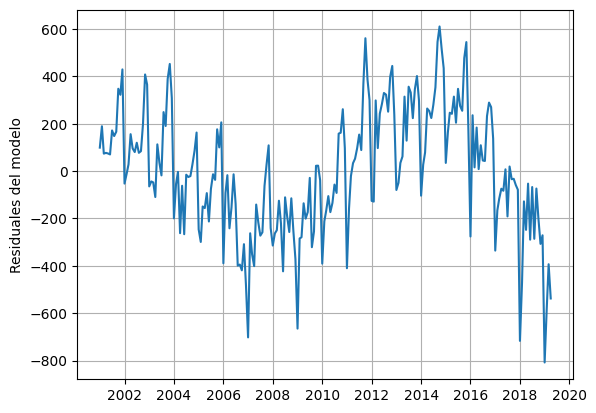

In [11]:
plt.ylabel("Residuales del modelo")
plt.plot(pol_2.resid)
plt.grid()

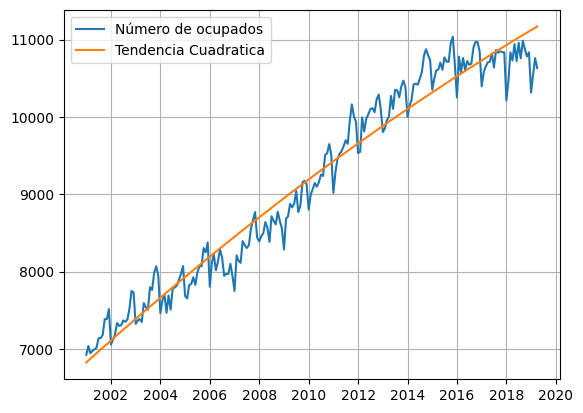

In [12]:
plt.plot(y,label="Número de ocupados")
plt.plot(pol_2.fittedvalues,label="Tendencia Cuadratica")
plt.legend()
plt.grid()
plt.show()

In [13]:
h=6
x_for= np.linspace((data.shape[0]+1),(data.shape[0]+h),h)
X_for= sm.add_constant(np.stack((x_for, x_for**2), axis=1))

In [14]:
dt = pol_2.get_prediction(X_for).summary_frame(alpha = 0.05)
y_prd = dt['mean']
yprd_ci_lower = dt['obs_ci_lower']
yprd_ci_upper = dt['obs_ci_upper']
preds = pd.DataFrame(np.column_stack([y_prd, yprd_ci_lower, yprd_ci_upper]))
preds.columns = ['Point_forecast', 'lower_95', 'upper_95']
preds.set_index(range_dates,inplace=True)
print(preds)

            Point_forecast      lower_95      upper_95
2019-05-01    11185.378113  10657.001417  11713.754809
2019-06-01    11201.072571  10672.306560  11729.838583
2019-07-01    11216.729673  10687.562292  11745.897054
2019-08-01    11232.349418  10702.768402  11761.930434
2019-09-01    11247.931806  10717.924680  11777.938932
2019-10-01    11263.476837  10733.030914  11793.922760


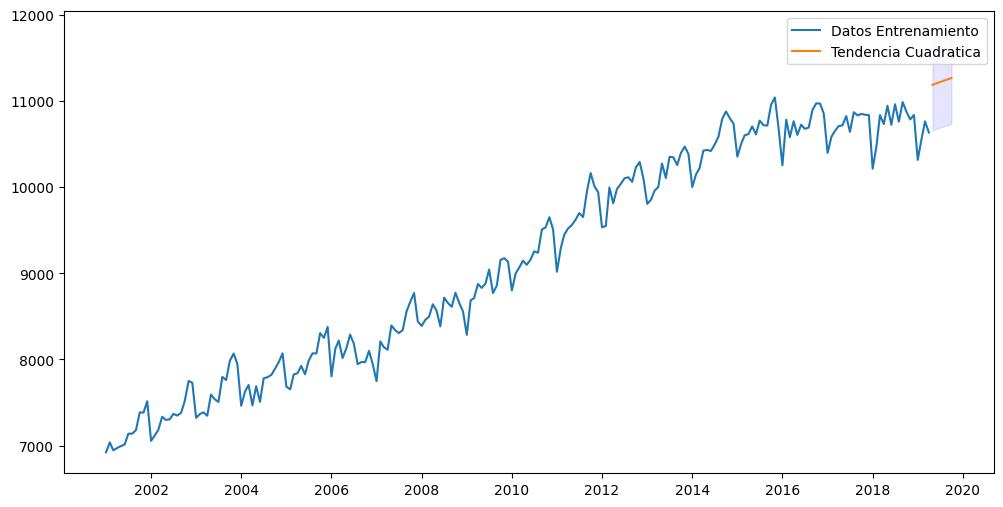

In [15]:
fig = plt.figure(figsize=(12, 6))
plt.plot(y.index,y,label="Datos Entrenamiento")
plt.plot(preds.index,preds['Point_forecast'],label="Tendencia Cuadratica")
plt.fill_between(preds.index ,preds['lower_95'], preds['upper_95'], color='blue', alpha=0.1)
plt.legend()
plt.show()

## **5. Estimación de la Estacionalidad**

In [16]:
month_dummies = pd.get_dummies(data.index.month,drop_first=True).set_index(data.index)
month_dummies = month_dummies.astype(int)

y = data["Ocupados"]
X = sm.add_constant(month_dummies)
sea = sm.OLS(y,X)
season = sea.fit()
print(season.summary())

                            OLS Regression Results                            
Dep. Variable:               Ocupados   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.038
Method:                 Least Squares   F-statistic:                    0.2787
Date:                Mon, 16 Dec 2024   Prob (F-statistic):              0.989
Time:                        22:06:47   Log-Likelihood:                -1886.0
No. Observations:                 220   AIC:                             3796.
Df Residuals:                     208   BIC:                             3837.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8808.2176    301.805     29.185      0.0

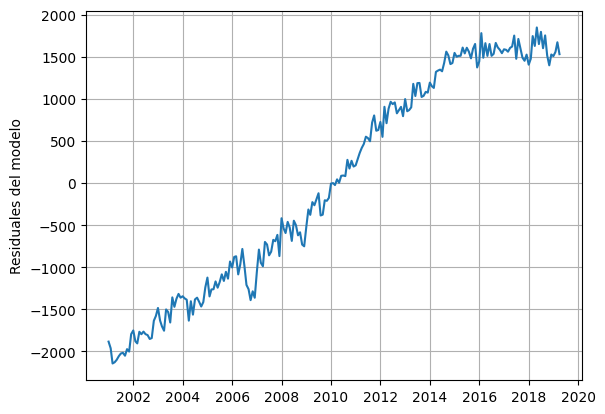

In [17]:
plt.ylabel("Residuales del modelo")
plt.plot(season.resid)
plt.grid()

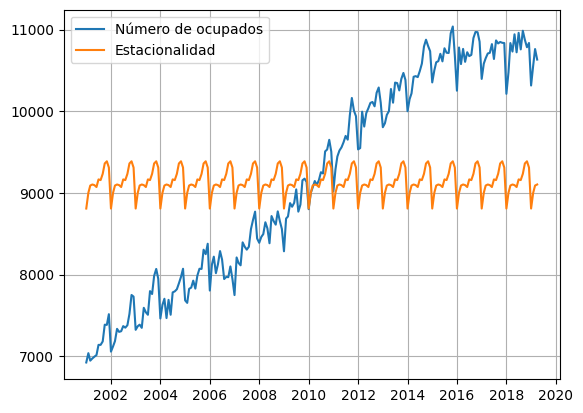

In [18]:
plt.plot(y,label="Número de ocupados")
plt.plot(season.fittedvalues,label="Estacionalidad")
plt.legend()
plt.grid()
plt.show()

In [19]:
range_dates = pd.date_range(data.index[-1]+ relativedelta(months=1), periods=12,freq='MS')
x_for = pd.get_dummies(range_dates.month, drop_first=True).astype(int)
X_for = sm.add_constant(x_for)
x_for = x_for[:6]

In [20]:
dt = season.get_prediction(X_for).summary_frame(alpha = 0.05)
y_prd = dt['mean']
yprd_ci_lower = dt['obs_ci_lower']
yprd_ci_upper = dt['obs_ci_upper']
preds = pd.DataFrame(np.column_stack([y_prd, yprd_ci_lower, yprd_ci_upper]))
preds.columns = ['Point_forecast', 'lower_95', 'upper_95']
preds.set_index(range_dates,inplace=True)
print(preds)

            Point_forecast     lower_95      upper_95
2019-05-01     9095.089000  6430.527026  11759.650974
2019-06-01     9071.789000  6407.227026  11736.350974
2019-07-01     9164.935167  6500.373193  11829.497140
2019-08-01     9156.633500  6492.071526  11821.195474
2019-09-01     9232.988500  6568.426526  11897.550474
2019-10-01     9359.934944  6695.372971  12024.496918
2019-11-01     9386.702222  6722.140249  12051.264196
2019-12-01     9310.332667  6645.770693  11974.894640
2020-01-01     8808.217632  6147.348746  11469.086517
2020-02-01     9001.037684  6340.168799  11661.906569
2020-03-01     9090.037158  6429.168273  11750.906043
2020-04-01     9102.647316  6441.778431  11763.516201


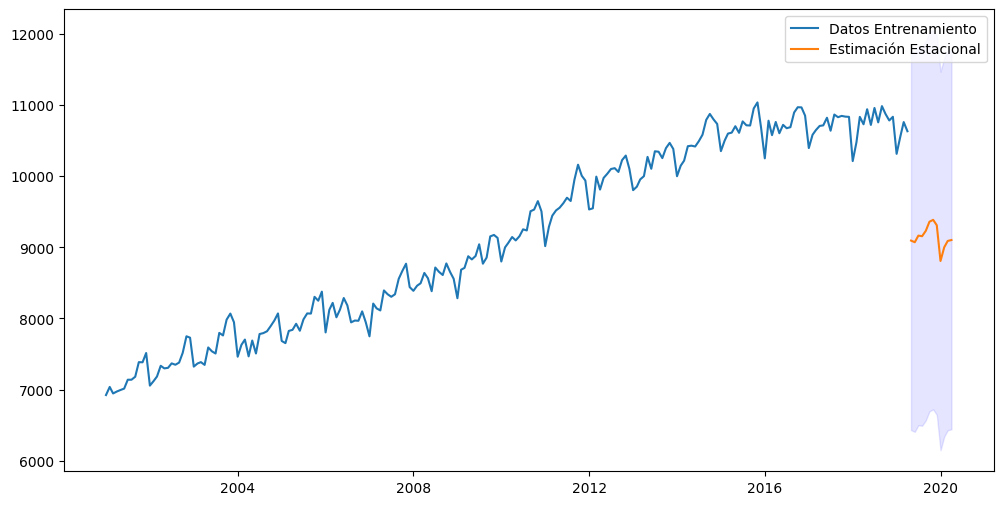

In [21]:
fig = plt.figure(figsize=(12, 6))
plt.plot(y.index,y,label="Datos Entrenamiento")
plt.plot(preds.index,preds['Point_forecast'],label="Estimación Estacional")
plt.fill_between(preds.index,preds['lower_95'], preds['upper_95'], color='blue', alpha=0.1)
plt.legend()
plt.show()

## **6. Tendencia + Estacionalidad**

In [22]:
y = data["Ocupados"]
data["x"] = np.linspace(1,data.shape[0],data.shape[0])
data["x2"] = x**2

month_dummies = pd.get_dummies(data.index.month,drop_first=True).set_index(data.index).astype(int)
X = sm.add_constant( pd.concat([data[["x","x2"]],month_dummies],axis=1) )

season_pol2 = sm.OLS(y,X)
season_pol_2 = season_pol2.fit()
print(season_pol_2.summary())

                            OLS Regression Results                            
Dep. Variable:               Ocupados   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     500.8
Date:                Mon, 16 Dec 2024   Prob (F-statistic):          5.58e-148
Time:                        22:06:51   Log-Likelihood:                -1504.4
No. Observations:                 220   AIC:                             3037.
Df Residuals:                     206   BIC:                             3084.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6514.3526     69.120     94.247      0.0

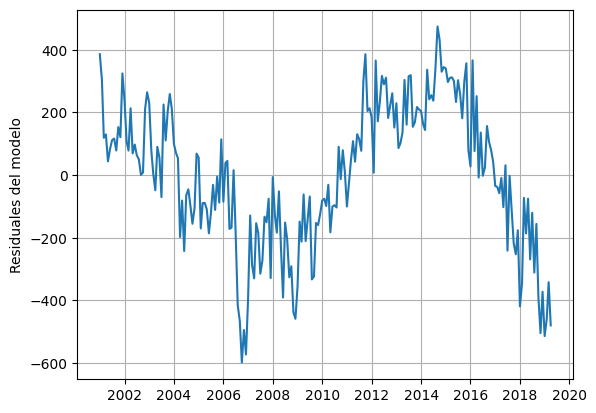

In [23]:
plt.ylabel("Residuales del modelo")
plt.plot(season_pol_2.resid)
plt.grid()

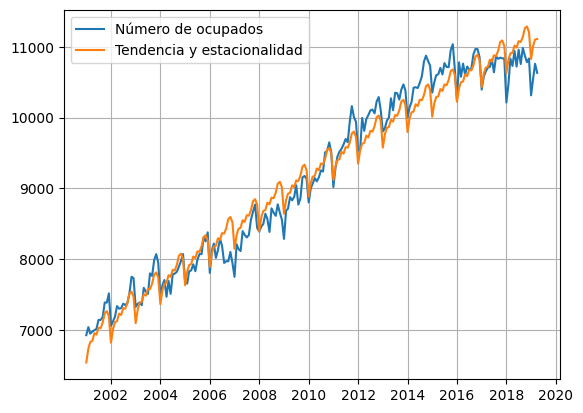

In [24]:
plt.plot(y,label="Número de ocupados")
plt.plot(season_pol_2.fittedvalues,label="Tendencia y estacionalidad")
plt.legend()
plt.grid()
plt.show()

In [25]:
h=6
x_for= np.linspace((data.shape[0]+1),(data.shape[0]+h),h)
x_for_all = pd.DataFrame(np.stack((x_for, x_for**2),axis=1),columns=["x","x2"] )

range_dates = pd.date_range(data.index[-1]+ relativedelta(months=1), periods=12,freq='MS')
x_for_dummies = pd.get_dummies(range_dates.month,drop_first=True).astype(int)[:h]

X_for= sm.add_constant(pd.concat([x_for_all,x_for_dummies],axis=1))
X_for

,const,x,x2,2,3,4,5,6,7,8,9,10,11,12
0,1.0,221.0,48841.0,0,0,0,1,0,0,0,0,0,0,0
1,1.0,222.0,49284.0,0,0,0,0,1,0,0,0,0,0,0
2,1.0,223.0,49729.0,0,0,0,0,0,1,0,0,0,0,0
3,1.0,224.0,50176.0,0,0,0,0,0,0,1,0,0,0,0
4,1.0,225.0,50625.0,0,0,0,0,0,0,0,1,0,0,0
5,1.0,226.0,51076.0,0,0,0,0,0,0,0,0,1,0,0


In [26]:
dt = season_pol_2.get_prediction(X_for).summary_frame(alpha = 0.05)
y_prd = dt['mean']
yprd_ci_lower = dt['obs_ci_lower']
yprd_ci_upper = dt['obs_ci_upper']
preds = pd.DataFrame(np.column_stack([y_prd, yprd_ci_lower, yprd_ci_upper]))
preds.columns = ['Point_forecast', 'lower_95', 'upper_95']
preds.set_index(range_dates[:h],inplace=True)
print(preds)

            Point_forecast      lower_95      upper_95
2019-05-01    11211.838909  10730.817019  11692.860800
2019-06-01    11184.654419  10703.336346  11665.972492
2019-07-01    11273.916096  10792.294026  11755.538167
2019-08-01    11261.729940  10779.796071  11743.663808
2019-09-01    11334.200450  10851.946998  11816.453902
2019-10-01    11457.262404  10974.681599  11939.843210


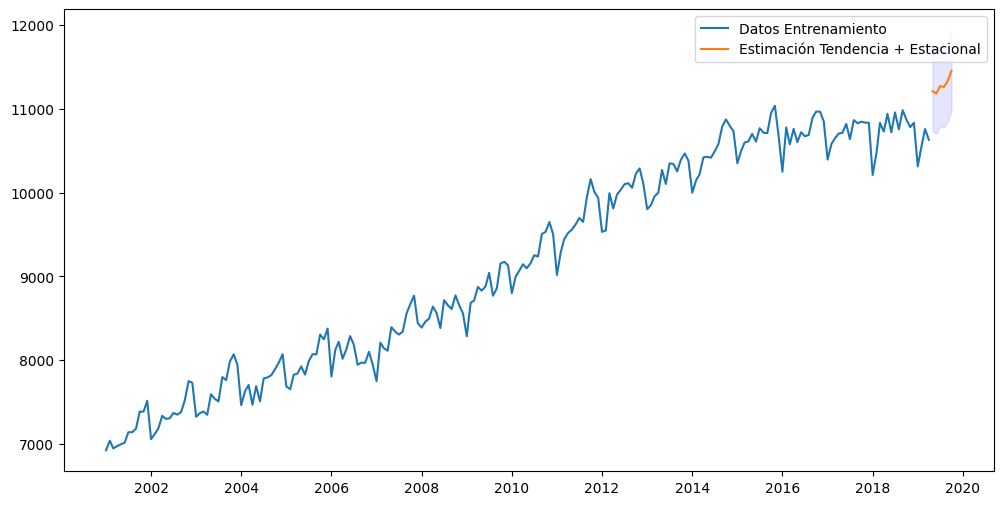

In [27]:
fig = plt.figure(figsize=(12, 6))
plt.plot(y.index,y,label="Datos Entrenamiento")
plt.plot(preds.index,preds['Point_forecast'],label="Estimación Tendencia + Estacional")
plt.fill_between(preds.index,preds['lower_95'], preds['upper_95'], color='blue', alpha=0.1)
plt.legend()
plt.show()

## **7. Comparación de modelos**



In [28]:
t = 6
X_train = X[:data.shape[0]-t]
y_train = y[:data.shape[0]-t]
X_test = X[data.shape[0]-t:]
y_test = y[data.shape[0]-t:]

### Tendencia lineal

In [29]:
lin = sm.OLS(y_train,X_train)
lin_t = lin.fit()

In [30]:
dt = lin_t.get_prediction(X_for).summary_frame(alpha = 0.05)
y_prd = dt['mean']
yprd_ci_lower = dt['obs_ci_lower']
yprd_ci_upper = dt['obs_ci_upper']
preds = pd.DataFrame(np.column_stack([y_prd, yprd_ci_lower, yprd_ci_upper]))
preds.columns = ['Point_forecast', 'lower_95', 'upper_95']
preds.set_index(y_test.index[-h:],inplace=True)

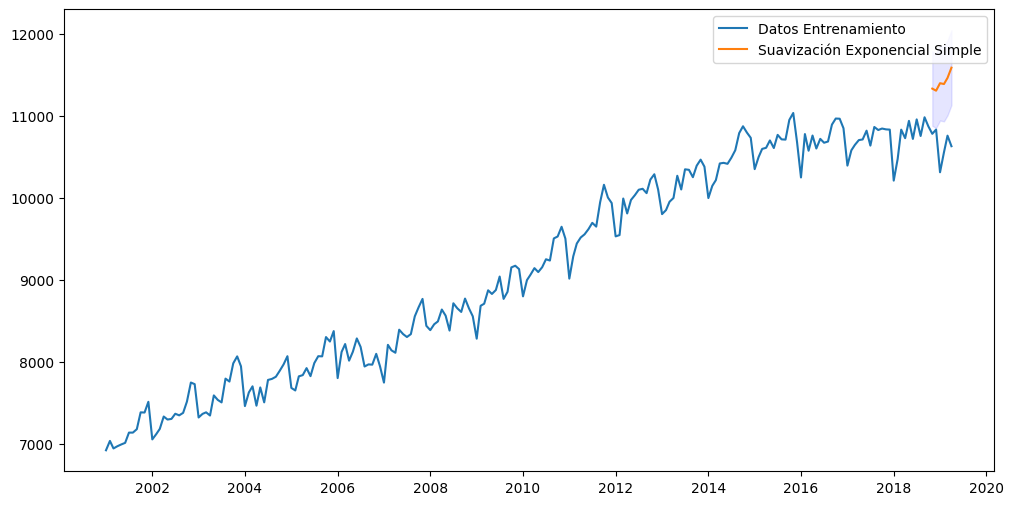

In [31]:
fig = plt.figure(figsize=(12, 6))
plt.plot(y.index,y,label="Datos Entrenamiento")
plt.plot(preds.index,preds['Point_forecast'],label="Suavización Exponencial Simple")
plt.fill_between(preds.index ,preds['lower_95'], preds['upper_95'], color='blue', alpha=0.1)
plt.legend()
plt.show()

In [32]:
rmse_lin = math.sqrt(mean_squared_error(y_test, y_prd))
print(f"RMSE: {rmse_lin}")

RMSE: 797.3639130493929


### Tendencia cuadratica

In [33]:
pol = sm.OLS(y_train,X_train)
pol_2 = pol.fit()

In [34]:
dt = pol_2.get_prediction(X_test).summary_frame(alpha = 0.05)
y_prd = dt['mean']
yprd_ci_lower = dt['obs_ci_lower']
yprd_ci_upper = dt['obs_ci_upper']
preds = pd.DataFrame(np.column_stack([y_prd, yprd_ci_lower, yprd_ci_upper]))
preds.columns = ['Point_forecast', 'lower_95', 'upper_95']
preds.set_index(y_test.index,inplace=True)

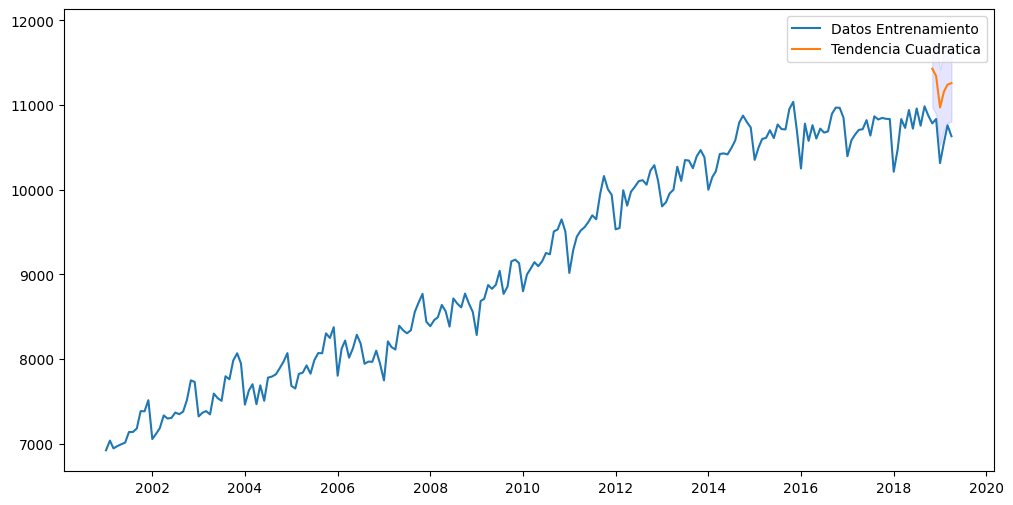

In [35]:
fig = plt.figure(figsize=(12, 6))
plt.plot(y.index,y,label="Datos Entrenamiento")
plt.plot(preds.index,preds['Point_forecast'],label="Tendencia Cuadratica")
plt.fill_between(preds.index ,preds['lower_95'], preds['upper_95'], color='blue', alpha=0.1)
plt.legend()
plt.show()

In [36]:
rmse_pol = math.sqrt(mean_squared_error(y_test, y_prd))
print(f"RMSE: {rmse_pol}")

RMSE: 590.479495713149


### Estacionalidad

In [37]:
sea = sm.OLS(y_train,X_train)
season = sea.fit()

In [38]:
dt = season.get_prediction(X_test).summary_frame(alpha = 0.05)
y_prd = dt['mean']
yprd_ci_lower = dt['obs_ci_lower']
yprd_ci_upper = dt['obs_ci_upper']
preds = pd.DataFrame(np.column_stack([y_prd, yprd_ci_lower, yprd_ci_upper]))
preds.columns = ['Point_forecast', 'lower_95', 'upper_95']
preds.set_index(y_test.index,inplace=True)

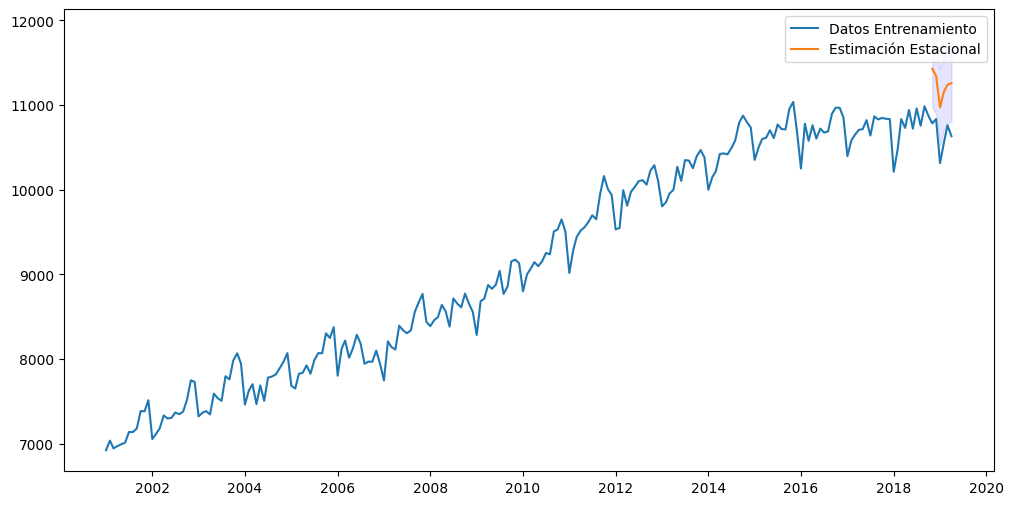

In [39]:
fig = plt.figure(figsize=(12, 6))
plt.plot(y.index,y,label="Datos Entrenamiento")
plt.plot(preds.index,preds['Point_forecast'],label="Estimación Estacional")
plt.fill_between(preds.index,preds['lower_95'], preds['upper_95'], color='blue', alpha=0.1)
plt.legend()
plt.show()

In [40]:
rmse_season = math.sqrt(mean_squared_error(y_test, y_prd))
print(f"RMSE: {rmse_season}")

RMSE: 590.479495713149


### Tendencia + Estacionalidad

In [41]:
season_pol2 = sm.OLS(y_train,X_train)
season_pol_2 = season_pol2.fit()

In [42]:
dt = season_pol_2.get_prediction(X_test).summary_frame(alpha = 0.05)
y_prd = dt['mean']
yprd_ci_lower = dt['obs_ci_lower']
yprd_ci_upper = dt['obs_ci_upper']
preds = pd.DataFrame(np.column_stack([y_prd, yprd_ci_lower, yprd_ci_upper]))
preds.columns = ['Point_forecast', 'lower_95', 'upper_95']
preds.set_index(y_test.index,inplace=True)

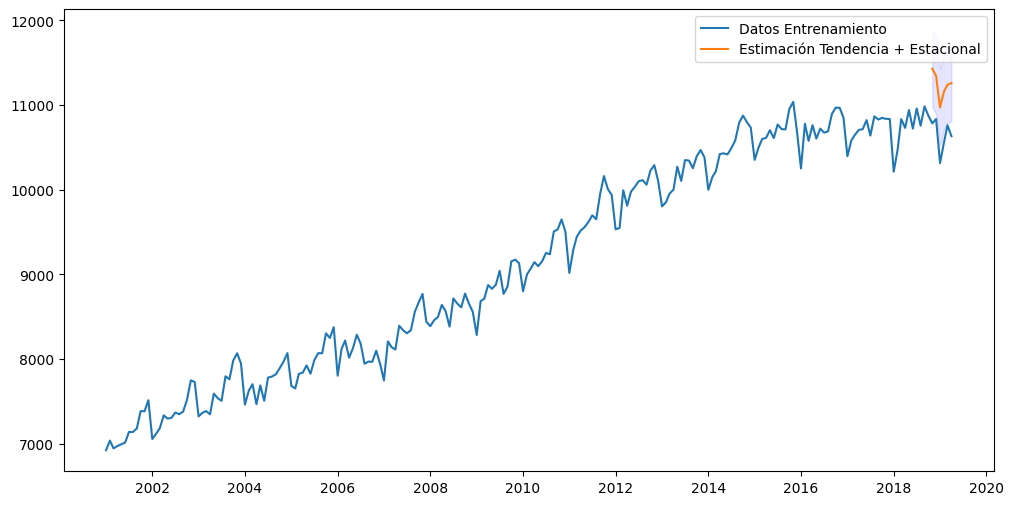

In [43]:
fig = plt.figure(figsize=(12, 6))
plt.plot(y.index,y,label="Datos Entrenamiento")
plt.plot(preds.index,preds['Point_forecast'],label="Estimación Tendencia + Estacional")
plt.fill_between(preds.index,preds['lower_95'], preds['upper_95'], color='blue', alpha=0.1)
plt.legend()
plt.show()

In [44]:
rmse_season_pol = math.sqrt(mean_squared_error(y_test, y_prd))
print(f"RMSE: {rmse_season_pol}")

RMSE: 590.479495713149


In [45]:
rmse_df = pd.DataFrame({
    'Modelo': ['Tendencia lineal', 'Tendencia cuadratica', 'Estacionalidad', 'Tendecia + Estacionalidad'],
    'RMSE': [rmse_lin, rmse_pol, rmse_season, rmse_season_pol]
})
rmse_df

,Modelo,RMSE
0,Tendencia lineal,797.363913
1,Tendencia cuadratica,590.479496
2,Estacionalidad,590.479496
3,Tendecia + Estacionalidad,590.479496
